In [1]:
import pandas as pd
import numpy as np

df_year = pd.read_csv("/Users/allenrichardu/Desktop/Topic in BA /year_2024_full.csv")
print(type(df_year))
print(df_year.columns)
print(df_year.shape)
print(df_year.head())
print(df_year.info())


<class 'pandas.core.frame.DataFrame'>
Index(['Number', 'Start date', 'Start station number', 'Start station',
       'End date', 'End station number', 'End station', 'Bike number',
       'Bike model', 'Total duration', 'Total duration (ms)'],
      dtype='object')
(8755152, 11)
      Number        Start date  Start station number  \
0  136666627  2024-01-14 23:59                  1108   
1  136666625  2024-01-14 23:57                  3447   
2  136666626  2024-01-14 23:57                  1090   
3  136666622  2024-01-14 23:56                200058   
4  136666623  2024-01-14 23:56                  1052   

                         Start station          End date  End station number  \
0         North Wharf Road, Paddington  2024-01-15 00:06                3423   
1  Gloucester Road (North), Kensington  2024-01-15 00:05                1214   
2        Warren Street Station, Euston  2024-01-15 00:02              200005   
3       Northdown Street, King's Cross  2024-01-15 00:06       

In [2]:
df_year = df_year.rename(columns={"Start date": "start_datetime", "End date": "end_datetime"})

In [3]:
df_year["start_datetime"] = pd.to_datetime(df_year["start_datetime"],  errors="coerce")
df_year["end_datetime"] = pd.to_datetime(df_year["end_datetime"],  errors="coerce")


In [4]:
df_year = df_year.dropna(subset=["start_datetime", "end_datetime"])


In [5]:
df_year["Total duration (ms)"] = pd.to_numeric(df_year["Total duration (ms)"], errors="coerce")
df_year = df_year.dropna(subset=["Total duration (ms)"])


In [6]:
df_year["duration"] = df_year["Total duration (ms)"] / 60000.0
df_year = df_year[(df_year["duration"] >=1) & (df_year["duration"] <= 24 * 60)]
df_year["duration"].describe()

count    7.032977e+06
mean     1.728789e+01
std      2.897578e+01
min      1.000000e+00
25%      7.671167e+00
50%      1.298118e+01
75%      2.071192e+01
max      1.439337e+03
Name: duration, dtype: float64

In [7]:
df_year = df_year.drop_duplicates().reset_index(drop=True)

In [8]:
df_year["date"] = df_year["start_datetime"].dt.date
df_year["year"] = df_year["start_datetime"].dt.year
df_year["month"] = df_year["start_datetime"].dt.month
df_year["dayofweek"] = df_year["start_datetime"].dt.dayofweek  
df_year["hour"] = df_year["start_datetime"].dt.hour
df_year["is_weekend"] = df_year["dayofweek"].isin([5, 6]).astype(int)
df_year[["start_datetime", "date", "month", "dayofweek", "hour", "is_weekend"]].head()

,start_datetime,date,month,dayofweek,hour,is_weekend
0,2024-01-14 23:59:00,2024-01-14,1,6,23,1
1,2024-01-14 23:57:00,2024-01-14,1,6,23,1
2,2024-01-14 23:57:00,2024-01-14,1,6,23,1
3,2024-01-14 23:56:00,2024-01-14,1,6,23,1
4,2024-01-14 23:56:00,2024-01-14,1,6,23,1


In [9]:
df_year["date"] = df_year["start_datetime"].dt.date
daily = df_year.groupby("date").agg(total_rentals_per_day=("date", "count"), avg_trip_duration_min=("duration", "mean")).reset_index()

daily["date"] = pd.to_datetime(daily["date"])
daily = daily.sort_values("date")

In [10]:
print(df_year.shape)
print(df_year.isna().sum())
print(df_year.dtypes)
print(df_year.head())

(7032977, 18)
Number                  0
start_datetime          0
Start station number    0
Start station           0
end_datetime            0
End station number      0
End station             0
Bike number             1
Bike model              0
Total duration          0
Total duration (ms)     0
duration                0
date                    0
year                    0
month                   0
dayofweek               0
hour                    0
is_weekend              0
dtype: int64
Number                           int64
start_datetime          datetime64[ns]
Start station number             int64
Start station                   object
end_datetime            datetime64[ns]
End station number               int64
End station                     object
Bike number                    float64
Bike model                      object
Total duration                  object
Total duration (ms)              int64
duration                       float64
date                            objec

In [11]:
df_year.to_csv("/Users/allenrichardu/Desktop/tfl_2024_clean.csv", index=False)

In [12]:
daily["total_rentals_per_day"].describe()

count      305.000000
mean     23058.940984
std       6232.722711
min       7398.000000
25%      18892.000000
50%      23489.000000
75%      27860.000000
max      34928.000000
Name: total_rentals_per_day, dtype: float64

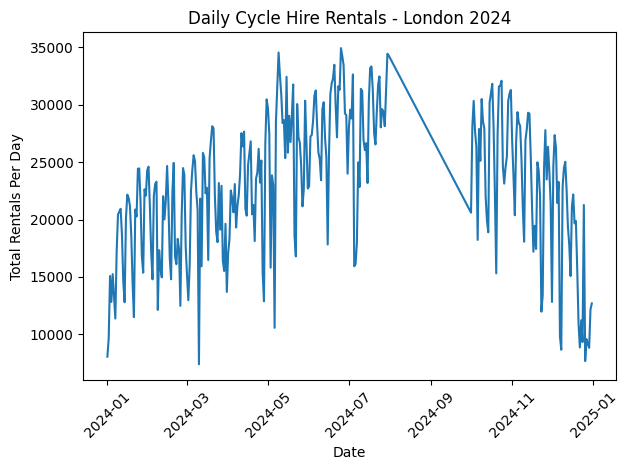

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
plt.plot(daily["date"], daily["total_rentals_per_day"])
plt.title("Daily Cycle Hire Rentals - London 2024")
plt.xlabel("Date")
plt.ylabel("Total Rentals Per Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
df_year["duration"].describe()

count    7.032977e+06
mean     1.728789e+01
std      2.897578e+01
min      1.000000e+00
25%      7.671167e+00
50%      1.298118e+01
75%      2.071192e+01
max      1.439337e+03
Name: duration, dtype: float64

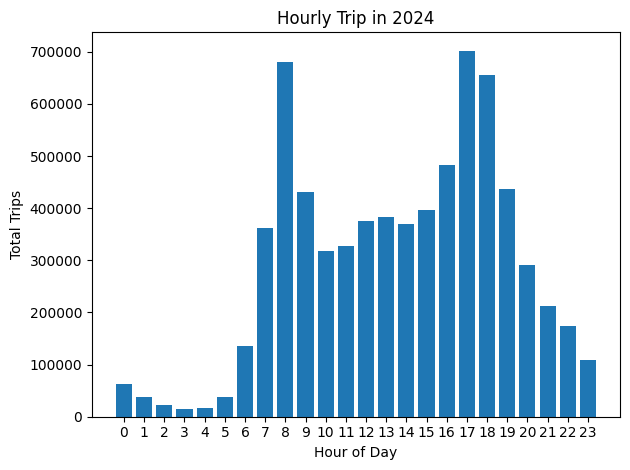

In [15]:
hourly = df_year.groupby(df_year["start_datetime"].dt.hour)["Number"].count().reset_index()
hourly.columns = ["hour", "total_trips"]

plt.figure()
plt.bar(hourly["hour"], hourly["total_trips"])
plt.title("Hourly Trip in 2024")
plt.xlabel("Hour of Day")
plt.ylabel("Total Trips")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [16]:
daily = df_year.groupby(["date", "is_weekend"]).agg(total_rentals_per_day=("date", "count"), avg_trip_duration_min=("duration", "mean")).reset_index()

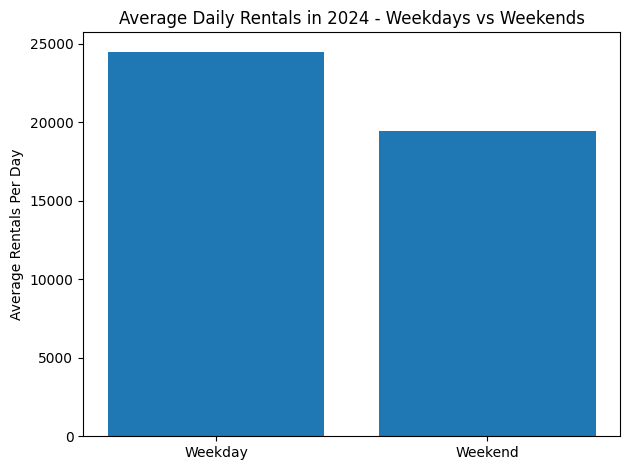

In [17]:
weekend_stats = daily.groupby("is_weekend")["total_rentals_per_day"].mean()

plt.figure()
plt.bar(["Weekday", "Weekend"], [weekend_stats[0], weekend_stats[1]])
plt.title("Average Daily Rentals in 2024 - Weekdays vs Weekends")
plt.ylabel("Average Rentals Per Day")
plt.tight_layout()
plt.show()

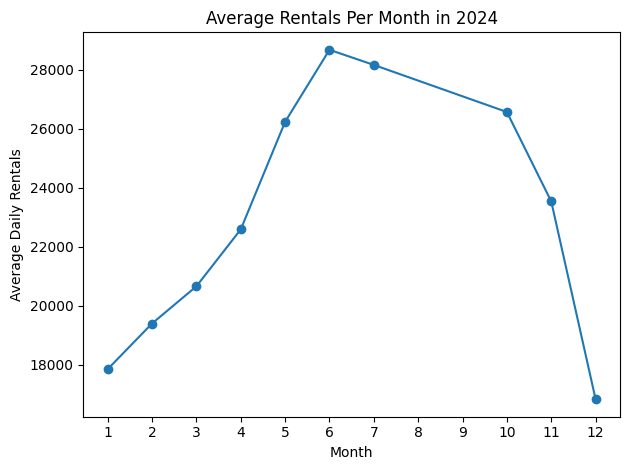

In [18]:
daily["date"] = pd.to_datetime(daily["date"])
monthly = daily.groupby(daily["date"].dt.month)["total_rentals_per_day"].mean().reset_index()
monthly.columns = ["month", "avg_rentals"]

plt.figure()
plt.plot(monthly["month"], monthly["avg_rentals"], marker="o")
plt.title("Average Rentals Per Month in 2024")
plt.xlabel("Month")
plt.ylabel("Average Daily Rentals")
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

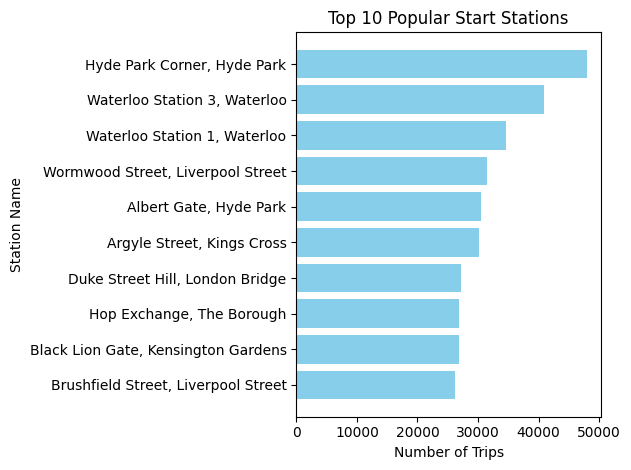

In [19]:
top_10_stations = df_year["Start station"].value_counts().nlargest(10).reset_index()
top_10_stations.columns = ["Station", "Trips"]

plt.figure()
plt.barh(top_10_stations["Station"], top_10_stations["Trips"], color= "Skyblue")
plt.title("Top 10 Popular Start Stations")
plt.xlabel("Number of Trips")
plt.ylabel("Station Name")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
daily["is_working_day"] = (1 - daily["is_weekend"]).astype(int)

In [22]:
model_df = daily[["total_rentals_per_day", "is_working_day", "avg_trip_duration_min"]].dropna()
x = model_df[["is_working_day", "avg_trip_duration_min"]].values
y = model_df["total_rentals_per_day"].values
             

In [23]:
print(x.shape, y.shape)

(305, 2) (305,)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
y_pred = model.predict(x_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:

print("Coefficients (is_working_day, avg_trip_duration_min):", model.coef_)
print("RMSE:", rmse)
print("R-squared:", r2)

Intercept: 956.0224375651887
Coefficients (is_working_day, avg_trip_duration_min): [7819.01139589  955.77053765]
RMSE: 4229.471082160968
R-squared: 0.48270139665550627


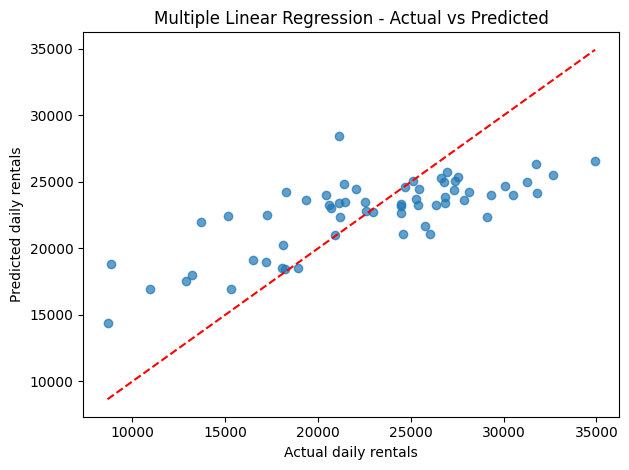

In [29]:
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual daily rentals")
plt.ylabel("Predicted daily rentals")
plt.title("Multiple Linear Regression - Actual vs Predicted")
plt.tight_layout()
plt.show()

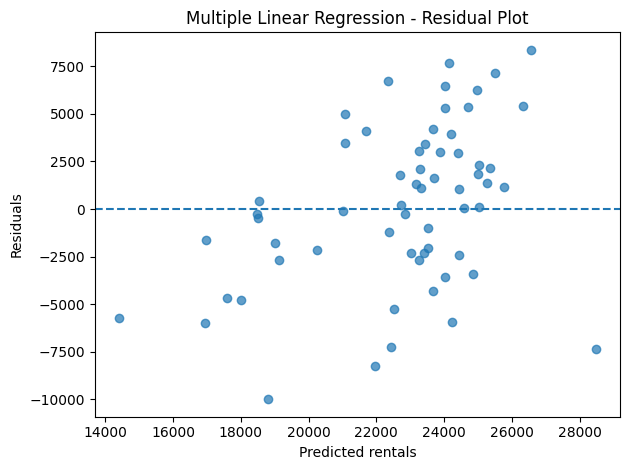

In [30]:
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted rentals")
plt.ylabel("Residuals")
plt.title("Multiple Linear Regression - Residual Plot")
plt.tight_layout()
plt.show()